<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 3: Probability Distributions, Likelihood, and LMFIT software

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 3.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- fill in information

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 3.1 Fitting Exercise 1

Now, we are going to see how this applies to fitting. Let us first generate some data randomly from from the model $y=2x$.

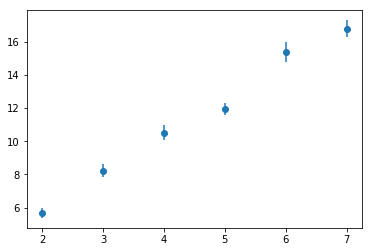

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit.models

np.random.seed(2)

xi = np.array([2,3,4,5,6,7])
yerr = np.array([0.3, 0.4, 0.45, 0.35, 0.6, 0.5])
yi = 2*xi+yerr*np.random.normal(xi.shape)

plt.errorbar(xi, yi, yerr= yerr, fmt = 'o')
plt.show()

Next we apply a linear fit.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 4.15245864
    reduced chi-square = 1.03811466
    Akaike info crit   = 1.79164679
    Bayesian info crit = 1.37516573
[[Variables]]
    slope:      2.21652713 +/- 0.09907205 (4.47%) (init = 1)
    intercept:  1.33570068 +/- 0.42328291 (31.69%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.919


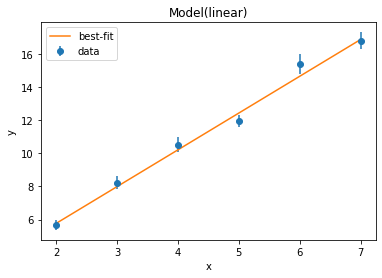

In [3]:
from lmfit.models import LinearModel
model = LinearModel()
result = model.fit(yi, x= xi, weights = 1/yerr)

result.plot_fit()
print(result.fit_report())

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 3.2 Fitting Exercise 2

There are many different types of built-in models in lmfit, including Gaussians, Lorentzians, and polynomials. Let us give some more examples for how to fit different functions. In this next example, use this randomly generated data and fit it to a Gaussian distribution.

<ErrorbarContainer object of 3 artists>

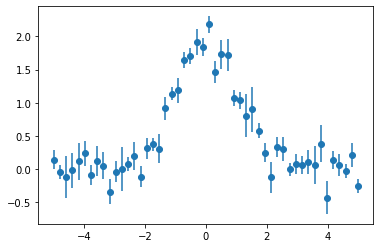

In [4]:
np.random.seed(2)
x = np.linspace(-5 , 5, 50)
yerr = 0.1+np.abs(0.1*np.random.normal(size = x.shape))

y = 5/(np.sqrt(2*np.pi*1.0))*np.exp(-0.5*x**2.0/1.0)+yerr*np.random.normal(size = x.shape)

plt.errorbar(x, y, yerr= yerr, fmt= 'o')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 52.4725341
    reduced chi-square = 1.11643689
    Akaike info crit   = 8.41334333
    Bayesian info crit = 14.1494123
[[Variables]]
    amplitude:  4.86908615 +/- 0.16166773 (3.32%) (init = 1)
    center:    -0.01951388 +/- 0.03789571 (194.20%) (init = 0)
    sigma:      0.99303398 +/- 0.03811848 (3.84%) (init = 1)
    fwhm:       2.33841628 +/- 0.08976215 (3.84%) == '2.3548200*sigma'
    height:     1.95611073 +/- 0.06460494 (3.30%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  0.583
    C(amplitude, center) =  0.146


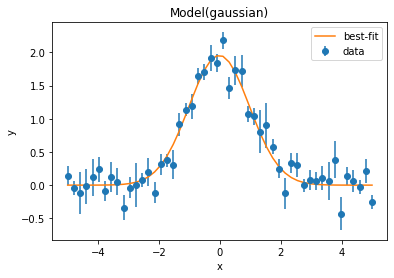

In [5]:
from lmfit.models import GaussianModel

gmodel = GaussianModel()

result = gmodel.fit(y, x=x, weights = 1/yerr)

print(result.fit_report())
result.plot_fit()

<!--start-block-->
<hr style="height: 1px;">

## 3.3 Fitting Exercise 3

Note that we can also construct models based on user defined functions. In this case, we need to be careful about the initial values and the limits that we set on the maximum and minimum values.

In [6]:
def weird_model(x, a, b, c):
    return a*np.sin(10*x) + b*np.exp(x)+ c*np.log(x)

<ErrorbarContainer object of 3 artists>

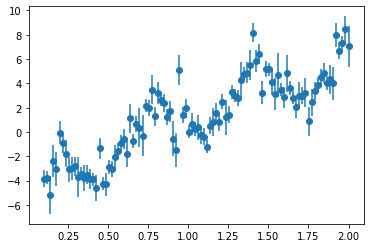

In [7]:
np.random.seed(2)
x = np.linspace(0.1 , 2, 100)
yerr = 0.5+np.abs(0.5*np.random.normal(size = x.shape))
y = weird_model(x, 2, 0.5, 3)+yerr*np.random.normal(size = x.shape)

plt.errorbar(x, y, yerr= yerr, fmt= 'o')

[[Model]]
    Model(weird_model)
[[Fit Statistics]]
    # fitting method   = dual_annealing
    # function evals   = 6049
    # data points      = 100
    # variables        = 3
    chi-square         = 120.648667
    reduced chi-square = 1.24380069
    Akaike info crit   = 24.7712558
    Bayesian info crit = 32.5867663
[[Variables]]
    a:  2.11871829 +/- 0.12048291 (5.69%) (init = 1)
    b:  0.53708165 +/- 0.02381274 (4.43%) (init = 1)
    c:  2.98384392 +/- 0.12308914 (4.13%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.188
    C(a, c) =  0.101


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

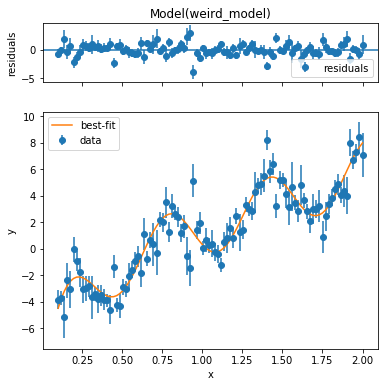

In [8]:
from lmfit.models import Model

wmodel = Model(weird_model)

wmodel.set_param_hint(name = 'a', value= 1, min = -10, max =10)
wmodel.set_param_hint(name = 'b', value= 1, min = -10, max =10)
wmodel.set_param_hint(name = 'c', value= 1, min = -10, max =10)

wmodel_result = wmodel.fit(y, x=x, weights = 1/yerr, method = 'dual_annealing')
print(wmodel_result.fit_report())
wmodel_result.plot()

In cases where we have time series data, or we want to evaluate a set of points all at once, it is useful to use the Minimizer class/features of lmfit. In this case, we define a residuals function which is minimized by the lmfit minimize function. This is another way to do the analysis easier.

In [9]:
from lmfit import Model, minimize, fit_report

def res_weird(params, x, data, error):
    a = params['a']
    b = params['b']
    c = params['c']
    val = a*np.sin(10*x) + b*np.exp(x)+ c*np.log(x)
    return (data-val)/error

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 100
    # variables        = 3
    chi-square         = 120.648667
    reduced chi-square = 1.24380069
    Akaike info crit   = 24.7712558
    Bayesian info crit = 32.5867663
[[Variables]]
    a:  2.11871863 +/- 0.12048291 (5.69%) (init = 1)
    b:  0.53708156 +/- 0.02381274 (4.43%) (init = 1)
    c:  2.99152799 +/- 0.12308913 (4.11%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.188
    C(a, c) =  0.101


<ErrorbarContainer object of 3 artists>

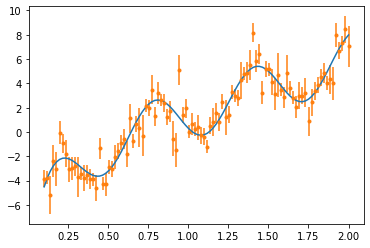

In [10]:
wmodel = Model(weird_model)
params = wmodel.make_params()
params['a'].set(1)
params['b'].set(1)
params['c'].set(1)

res = minimize(res_weird, params = params, args= ( x, y, yerr))

print(fit_report(res))

plt.plot(x, wmodel.eval(params = res.params, x= x ))
plt.errorbar(x, y, yerr= yerr, fmt = '.')

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 3.4 Analysis of Time Series Data

Now, we are going to go through an example that is more relevent to the project. Now, this analysis is going to be similar to what you are going to do in your project, but its going to be different in several ways.

In [12]:
from functions import gwfreq, osc_scale, osc, lower, higher
from gwpy.timeseries import TimeSeries
import h5py
from scipy.interpolate import interp1d

import os

fn = 'H-H1_GWOSC_16KHZ_R1-1126257415-4096.hdf5' # data file
tevent = 1126259462.422 # Mon Sep 14 09:50:45 GMT 2015
evtname = 'GW150914' # event name

detector = 'H1' # detecotr: L1 or H1

strain = TimeSeries.read(fn, format='hdf5.losc')
center = int(tevent)
strain = strain.crop(center-16, center+16)
asd = strain.asd(fftlength = 1)

NRtime, NR_H1 = np.genfromtxt('GW150914_4_NR_waveform.txt').transpose()
nrdata= TimeSeries(NR_H1, times = NRtime)

Define a function that whitens and filters the data.

In [13]:
def whiten_and_bandpass(strain, asd, bp_low, bp_high):
    fft = strain.fft()
    asdinterp = interp1d(asd.frequencies, asd)
    asddiv =asdinterp(fft.frequencies)
    white_freq = fft/asddiv
    white = white_freq.ifft()
    whitebp = white.bandpass(bp_low,bp_high)
    return TimeSeries(whitebp, t0=strain.t0)

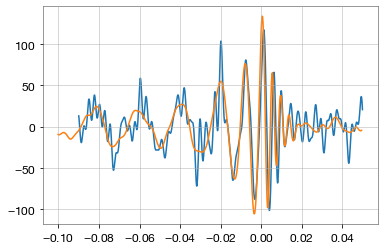

In [14]:
low_pass = lower()
high_pass = higher()

whitened_data = whiten_and_bandpass(strain, asd, low_pass, high_pass)
wnr = whiten_and_bandpass(nrdata, asd, low_pass, high_pass).crop(-0.1, 0.05)
zoom = whitened_data.crop(tevent-0.09, tevent+0.05)
zoom.t0 = -0.09
x = np.array(zoom.times)
white_data_bp_zoom = zoom.value
plt.plot(x, white_data_bp_zoom)
plt.plot(wnr.times, wnr.value)

Define a funciton that...

In [15]:
# define osc_dif for lmfit::minimize()
def osc_dif(params, x, data, data_asd, low_pass, high_pass):
    iM=params["Mc"]
    iT0=params["t0"]
    norm=params["C"]
    phi=params["phi"]
    model_strain = TimeSeries(osc(x, iM, iT0, phi, norm), times = x)
    val = whiten_and_bandpass(model_strain, data_asd, low_pass, high_pass)
    residuals = val-data
    return residuals

def osc_white(t, Mc, t0, phi, C, data_asd=None, low_pass = None, high_pass = None):
    model_strain = TimeSeries(osc(t, Mc, t0, phi, C), times = t)
    val = whiten_and_bandpass(model_strain, data_asd, low_pass, high_pass) 
    return val

Plot...

[[Model]]
    Model(osc_white, data_asd='FrequencySeries([7.65766160e-21, 5.27466087e-21, 1.79902923e-21,
                 ..., 4.13529748e-27, 1.93020111e-27,
                 5.18190948e-28]
                unit: 1 / Hz(1/2),
                f0: 0.0 Hz,
                df: 1.0 Hz,
                epoch: 1126259446.0,
                name: Strain,
                channel: None)', low_pass='30', high_pass='400')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 125
    # data points      = 2294
    # variables        = 4
    chi-square         = 1738968.89
    reduced chi-square = 759.375061
    Akaike info crit   = 15218.9419
    Bayesian info crit = 15241.8941
[[Variables]]
    Mc:   18.9452783 +/- 0.12340702 (0.65%) (init = 25)
    t0:   0.00677246 +/- 1.1180e-04 (1.65%) (init = 0.004)
    phi:  2.43536837 +/- 0.06685045 (2.74%) (init = 1.246854)
    C:    0.19523953 +/- 0.00693702 (3.55%) (init = 0.1885356)
[[Correlations]] (unreported correlations are < 

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

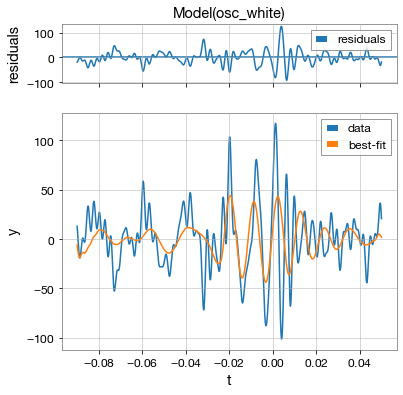

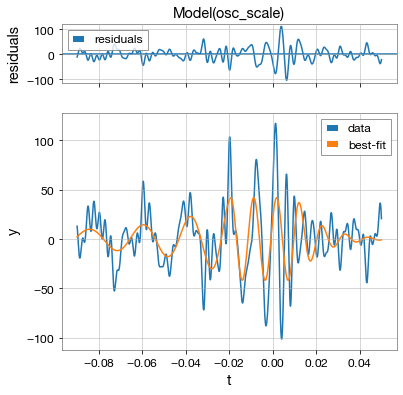

In [16]:
owmodel = lmfit.Model(osc_white, data_asd = asd, low_pass = low_pass, high_pass = high_pass)
owmodel.set_param_hint(name = 'Mc', value = 25, min = 10, max = 30)
owmodel.set_param_hint(name = 't0', value = 0.004, min = -0.015, max = 0.015)
owmodel.set_param_hint(name = 'C', value = 0.18853556, min = 0.01, max = 10)
owmodel.set_param_hint(name = 'phi', value = 1.24685424, min = 0, max = 2*np.pi)

omodel = lmfit.Model(osc_scale)
omodel.set_param_hint(name = 'Mc', value = 25)
omodel.set_param_hint(name = 't0', value = 0.01)
omodel.set_param_hint(name = 'C', value = 0.18853556)
omodel.set_param_hint(name = 'phi', value = 1.24685424)

result_white = owmodel.fit(white_data_bp_zoom, t = x)
print(result_white.fit_report())
result_white.plot(datafmt='-')

result = omodel.fit(white_data_bp_zoom, t = x)
print(result.fit_report())
result.plot(datafmt='-')



[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 115
    # data points      = 2294
    # variables        = 4
    chi-square         = 1741478.13
    reduced chi-square = 760.470797
    Akaike info crit   = 15222.2496
    Bayesian info crit = 15245.2018
[[Variables]]
    Mc:   19.4154010 +/- 0.17814919 (0.92%) (init = 25)
    t0:   0.00481934 +/- 1.6769e-04 (3.48%) (init = -0.005)
    phi:  7.60442799 +/- 0.12873418 (1.69%) (init = 1.246854)
    C:    0.19748970 +/- 0.00697547 (3.53%) (init = 0.1885356)
[[Correlations]] (unreported correlations are < 0.100)
    C(Mc, phi) = -0.944
    C(t0, phi) =  0.933
    C(Mc, t0)  = -0.878
    C(t0, C)   = -0.105


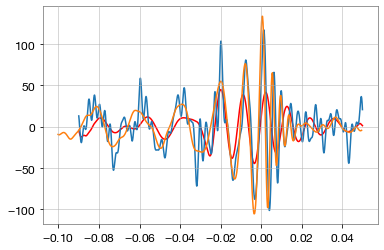

In [18]:
import lmfit
from lmfit import Model, minimize, fit_report, Parameters

model = lmfit.Model(osc_white)
p = model.make_params()
p['Mc'].set(25)     # Mass guess
p['t0'].set(-0.005)  # By construction we put the merger in the center
p['C'].set(0.18853556)      # normalization guess
p['phi'].set(1.24685424)    # Phase guess
out = minimize(osc_dif, params=p, args=(x, white_data_bp_zoom, asd, low_pass, high_pass))
print(fit_report(out))
best_fit = model.eval(params=out.params,t=x, data_asd = asd, low_pass = low_pass, high_pass = high_pass)
init_fit = model.eval(params=p,t=x, data_asd = asd, low_pass = low_pass, high_pass = high_pass)
plt.plot(x, best_fit,'r',label='best fit')
#plt.plot(x, init_fit,'b',label='init')
plt.plot(x, white_data_bp_zoom)
plt.plot(wnr.times, wnr.value)
plt.show()

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->